# **Starting Set-up**

In [ ]:
# Install Required Libs
#======================
!pip install transformers
!pip install PyDrive
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Required Packages
#=========================

# General Purpose Packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Transformers Model & Tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification

# Transformers Function for Create Input Example & Input Feature
from transformers import InputExample, InputFeatures

# Keras
import tensorflow as tf
from tensorflow import keras

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
# Define Model & Tokenizer
#=========================
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",  
                                                        from_pt = True,
                                                        num_labels = 3)       # Set jumlah kelas / label yang akan diprediksi model
                                                        
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Get Model Information
#======================
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Connect to G-Drive
#===================
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Pre-processing**

## Basic Pre-process

In [ ]:
# Define URLs for Data from G-Drive
#==================================
proj_path = '/content/gdrive/MyDrive/content/'

# Set Data Into Datafram
#=======================
df = pd.read_csv(proj_path + 'Tweets.csv')
df = df.dropna()

# Get Data Info
#==============
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [ ]:
print(df.shape)

(27480, 4)


In [ ]:
# Test Call
#==========
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
# Change Column Name
#===================
df.rename(columns = {'selected_text':'DATA_COLUMN'}, inplace = True)
df.rename(columns = {'sentiment':'LABEL_COLUMN'}, inplace = True)

In [ ]:
# Convert Label Into Numeric
#===========================
datalabel = {'neutral':0, 'negative':1, 'positive':2}
df.LABEL_COLUMN =[datalabel[item] for  item in df.LABEL_COLUMN]

# Test Call
#==========
df.head()

,textID,text,DATA_COLUMN,LABEL_COLUMN
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1
2,088c60f138,my boss is bullying me...,bullying me,1
3,9642c003ef,what interview! leave me alone,leave me alone,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1


In [ ]:
# Remove UN-USED COLUMN
#======================
df.drop(['textID', 'text'], axis = 1, inplace = True)

# Test Call
#==========
df.head()

,DATA_COLUMN,LABEL_COLUMN
0,"I`d have responded, if I were going",0
1,Sooo SAD,1
2,bullying me,1
3,leave me alone,1
4,"Sons of ****,",1


## Extract & Splitting Data

In [ ]:
# Reset Index
#============
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
# Test Call
#==========
df

,DATA_COLUMN,LABEL_COLUMN
0,"I`d have responded, if I were going",0
1,Sooo SAD,1
2,bullying me,1
3,leave me alone,1
4,"Sons of ****,",1
...,...,...
27475,d lost,1
27476,", don`t force",1
27477,Yay good for both of you.,2
27478,But it was worth it ****.,2


In [ ]:
# Extract Only Required Rows for Research
#========================================
df_new = df.sample(10000)

df_new.reset_index(drop=True, inplace=True)
# Test Call
#==========

df_new

,DATA_COLUMN,LABEL_COLUMN
0,"A nice,",2
1,good,2
2,Busy day! No time to,1
3,"Well, thanks for thinking of me! And if you ev...",2
4,Shower/traffic/factory yaaaay,0
...,...,...
9995,what? whyyyy?,0
9996,Thanks.,2
9997,but no one`s going with me,1
9998,"i feel extra-nauseous all of a sudden,",1


In [ ]:
# Create Train Data
#==================
df_train = df_new.sample(frac = 0.65)
df_train.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_train

,DATA_COLUMN,LABEL_COLUMN
0,We`ll be moving from a strength to a hypertrop...,0
1,Well actually - Larin is my name. The 'model' ...,0
2,IM FEELIN RITE.. THE MOOD FLOR TWITTER AFTER D...,0
3,ugly,1
4,Enjoy! Family trumps everything,2
...,...,...
6495,lonely,1
6496,stuck in,1
6497,Whew!,2
6498,i like it,2


In [ ]:
# Set Temporary Dataframe
#========================
df_temporary = df_new.drop(df_train.index)
df_temporary.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_temporary

,DATA_COLUMN,LABEL_COLUMN
0,y I ho,2
1,"Hey there, I just crop them in Photoshop and p...",0
2,I`m going to be doing the FAFSA form today. I...,0
3,is thrilled prom went well,2
4,"i miss everyone... i need faces , not witty s...",2
...,...,...
3495,what? whyyyy?,0
3496,Thanks.,2
3497,but no one`s going with me,1
3498,"i feel extra-nauseous all of a sudden,",1


In [ ]:
# Create Validation Data
#=======================
df_valid = df_temporary.sample(frac = 0.65)
df_valid.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_valid

,DATA_COLUMN,LABEL_COLUMN
0,celebrating her first day,2
1,thanks so much! we love fanmail talk to us an...,2
2,so cut,2
3,I miss him.,1
4,could you post a link to the internet version ...,0
...,...,...
2270,In the UK with no phone service oh yea and st...,1
2271,u fallin off sad face,1
2272,annoying,1
2273,excited!,2


In [ ]:
# Create Test Data
#=================
df_test = df_temporary.drop(df_valid.index)
df_test.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_test

,DATA_COLUMN,LABEL_COLUMN
0,"haha ofcoooursee you do, its pretty much a mus...",0
1,Won`t really get a break till custody issue is...,0
2,"gandang mac un ah! for sure, if its out in the...",0
3,Good morning ladies and Gents. it`s going to ...,0
4,feel bad,1
...,...,...
1220,what? whyyyy?,0
1221,Thanks.,2
1222,but no one`s going with me,1
1223,"i feel extra-nauseous all of a sudden,",1


## Create Function To Convert Data Into Input Example & Features

In [ ]:
# Function For Convert Data Into Input Example
#=============================================
def convert_data_to_examples(df_train, df_valid, df_test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = df_train.apply(lambda x: InputExample(guid   = None,                       # Globally unique ID for bookkeeping, unused in this case
                                                           text_a = x[DATA_COLUMN], 
                                                           text_b = None,
                                                           label  = x[LABEL_COLUMN]),axis = 1)

  validation_InputExamples = df_valid.apply(lambda x: InputExample(guid   = None,                  # Globally unique ID for bookkeeping, unused in this case
                                                                text_a = x[DATA_COLUMN], 
                                                                text_b = None,
                                                                label  = x[LABEL_COLUMN]), axis = 1)
  
  test_InputExamples = df_test.apply(lambda x: InputExample(guid   = None,                         # Globally unique ID for bookkeeping, unused in this case
                                                         text_a = x[DATA_COLUMN], 
                                                         text_b = None,
                                                         label  = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples, test_InputExamples


# Function For Convert Input Example Into TF Dataset
#===================================================
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            padding='max_length',
            verbose=False
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
                                                     input_dict["token_type_ids"],
                                                     input_dict["attention_mask"])


        features.append(
            InputFeatures(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )
def pad_inputs(input_ids, attention_masks, token_type_ids, max_len):
    # Pad input_ids with zeros
    input_ids = tf.keras.preprocessing.sequence.pad_sequences(
        input_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    # Pad attention_masks with zeros
    attention_masks = tf.keras.preprocessing.sequence.pad_sequences(
        attention_masks, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    # Pad token_type_ids with zeros
    token_type_ids = tf.keras.preprocessing.sequence.pad_sequences(
        token_type_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    return input_ids, attention_masks, token_type_ids


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'


## Convert Data

In [ ]:
# Convert Into Input Example
#===========================
train_InputExamples, validation_InputExamples, test_InputExamples = convert_data_to_examples(df_train, df_valid, df_test, DATA_COLUMN, LABEL_COLUMN)

# Convert Into TF Dataset or Features
#====================================
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(16)

test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(16)


# **Main Experiment**

In [ ]:
# Compile Model for Training
#===========================
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5, epsilon = 1e-08, clipnorm = 1.0), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
# Model Training
#===============
training_history = model.fit(train_data,
                             epochs = 10,
                             validation_data = validation_data)


Epoch 1/10
407/407 [==============================] - 271s 517ms/step - loss: 0.4575 - accuracy: 0.8225 - val_loss: 0.2516 - val_accuracy: 0.9160
Epoch 2/10
407/407 [==============================] - 192s 472ms/step - loss: 0.2220 - accuracy: 0.9252 - val_loss: 0.1995 - val_accuracy: 0.9349
Epoch 3/10
407/407 [==============================] - 191s 469ms/step - loss: 0.1168 - accuracy: 0.9634 - val_loss: 0.1761 - val_accuracy: 0.9578
Epoch 4/10
407/407 [==============================] - 192s 471ms/step - loss: 0.0640 - accuracy: 0.9828 - val_loss: 0.1800 - val_accuracy: 0.9508
Epoch 5/10
407/407 [==============================] - 210s 517ms/step - loss: 0.0375 - accuracy: 0.9912 - val_loss: 0.2066 - val_accuracy: 0.9578
Epoch 6/10
407/407 [==============================] - 191s 470ms/step - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.2222 - val_accuracy: 0.9560
Epoch 7/10
407/407 [==============================] - 191s 470ms/step - loss: 0.0244 - accuracy: 0.9938 - val_loss: 0.2226 -

# **Model Evaluation**

In [ ]:
pred_sentences = ['I Like you',
                  'I don`t like you']


In [ ]:
# Tokenizer Test Sentence
#========================
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')

# Predict Label
#==============
tf_outputs = model(tf_batch)

# Softmax Final Score For Label Predict
#======================================
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

# Argmax The Score To Get Single Label
#=====================================
label = tf.argmax(tf_predictions, axis=1)

# Convert Into Numpy Array
#=========================
label = label.numpy()

# Get Final Label
#================
labels = ['Positive','Negative','Neutral']
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

I Like you : 
 Neutral
I don`t like you : 
 Negative


In [ ]:
# Simple Model Evaluation Base On Test Sentences
#===============================================
test_results = model.evaluate(test_data)
print('Test Loss:', test_results[0])
print('Test Accuracy:', test_results[1])

77/77 [==============================] - 12s 152ms/step - loss: 0.2208 - accuracy: 0.9567
Test Loss: 0.2207614630460739
Test Accuracy: 0.9567347168922424


# Visualization Data

In [ ]:
df_train.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_train.csv')


In [ ]:
df_valid.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_valid.csv')



In [ ]:
df_test.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_test.csv')



In [ ]:
# Create & Reshape Y_Test from df_test.LABEL_COLUMN
#==================================================
y_test = df_test.LABEL_COLUMN.to_numpy()
print(y_test)

[0 0 0 ... 1 1 1]


In [ ]:
y_test


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
result_bert = model.predict(test_data)

77/77 [==============================] - 15s 149ms/step


In [ ]:
result_bert

TFSequenceClassifierOutput(loss=None, logits=array([[ 5.5645275 , -1.9671085 , -3.745758  ],
       [ 5.115784  , -0.81069326, -4.361903  ],
       [ 5.1232753 , -4.7806444 , -0.51043457],
       ...,
       [-3.0721636 ,  5.912244  , -2.7806377 ],
       [-2.869706  ,  5.7992353 , -2.8343396 ],
       [-3.2176602 ,  6.028706  , -2.6598353 ]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
# Argmax To Get Single Label
#===========================
y_pred_bert = np.argmax(result_bert.logits, axis=1)

In [ ]:
y_pred_bert


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Print classification report
#============================
target_names = ['Negative', 'Neutral', 'Positive']
print('Classification Report for BERT:\n', classification_report(y_test,                           # Real Label from df_test.LABEL_COLUMN
                                                                 y_pred_bert,                      # Predicted Label by model using df_test.DATA_COLUMN
                                                                 target_names = target_names))     # Convert Numeric Label Into String Label

Classification Report for BERT:
               precision    recall  f1-score   support

    Negative       0.96      0.96      0.96       514
     Neutral       0.94      0.96      0.95       358
    Positive       0.97      0.96      0.97       353

    accuracy                           0.96      1225
   macro avg       0.96      0.96      0.96      1225
weighted avg       0.96      0.96      0.96      1225



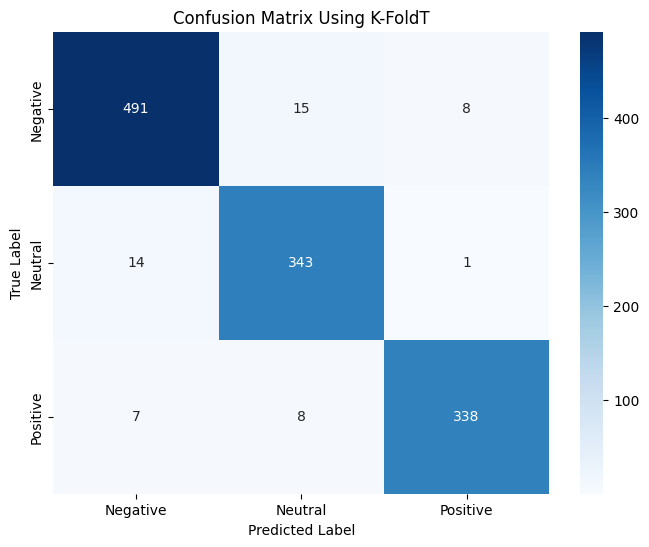

In [ ]:
# Generate confusion matrix
#==========================
confusion_mat = confusion_matrix(y_test, y_pred_bert)

# Create a DataFrame from the confusion matrix
#=============================================
confusion_df = pd.DataFrame(confusion_mat, index=target_names, columns=target_names)

# Plot the confusion matrix
#==========================
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Using K-FoldT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()